### Installation


Install MMCV, MMEngine

In [1]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 923.6 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 24.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 12.8 MB/s eta 0:00:00


 Install MMDetection from the source

In [2]:
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 35529, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 35529 (delta 39), reused 122 (delta 23), pack-reused 35336
Receiving objects: 100% (35529/35529), 47.36 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (24967/24967), done.
/content/mmdetection
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [3]:
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.1 MB/s eta 0:00:00


In [4]:
import mmdet
print(mmdet.__version__)

3.0.0


### Instance Segmentation

#### Setup the Model

In [5]:
import torch, torchvision
import mmdet
import mmcv
import mmengine

In [6]:
!mim download mmdet --config mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco --dest ./checkpoints

processing mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 40.6 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth to /content/mmdetection/checkpoints
Successfully dumped mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py to /content/mmdetection/checkpoints


In [7]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS

# Define the cfg
config_file = 'configs/mask_rcnn/mask-rcnn_r50-caffe_fpn_ms-poly-3x_coco.py'

# Setup a checkpoint file to load
checkpoint_file = 'checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth'

# register all modules in mmdet into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

# Setup the visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

Loads checkpoint by local backend from path: checkpoints/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
05/04 22:20:18 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


#### Image Segmentation and plotting

In [8]:
# Mount the gdrive for images
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
def segment_image(image):
  result = inference_detector(model, image)
  return result

def get_result_info(result):
  output = {}
  # Save the Bounding boxes, labels and masks
  output["bboxes"] = result.pred_instances.bboxes
  output["labels"] = result.pred_instances.labels
  output["masks"] = result.pred_instances.masks
  output["meta"] = result.metainfo
  return output

def visualize_result(visualizer,image,result):
  visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    wait_time=0,
  )
  return visualizer
  

In [10]:
from mmdet.datasets.coco import CocoDataset
labels = CocoDataset.METAINFO['classes']
for i,label in enumerate(labels):
  print(f"{i}-{label}")

0-person
1-bicycle
2-car
3-motorcycle
4-airplane
5-bus
6-train
7-truck
8-boat
9-traffic light
10-fire hydrant
11-stop sign
12-parking meter
13-bench
14-bird
15-cat
16-dog
17-horse
18-sheep
19-cow
20-elephant
21-bear
22-zebra
23-giraffe
24-backpack
25-umbrella
26-handbag
27-tie
28-suitcase
29-frisbee
30-skis
31-snowboard
32-sports ball
33-kite
34-baseball bat
35-baseball glove
36-skateboard
37-surfboard
38-tennis racket
39-bottle
40-wine glass
41-cup
42-fork
43-knife
44-spoon
45-bowl
46-banana
47-apple
48-sandwich
49-orange
50-broccoli
51-carrot
52-hot dog
53-pizza
54-donut
55-cake
56-chair
57-couch
58-potted plant
59-bed
60-dining table
61-toilet
62-tv
63-laptop
64-mouse
65-remote
66-keyboard
67-cell phone
68-microwave
69-oven
70-toaster
71-sink
72-refrigerator
73-book
74-clock
75-vase
76-scissors
77-teddy bear
78-hair drier
79-toothbrush


In [11]:
IMAGE_PATH = input("Enter the path for image: ")

KeyboardInterrupt: ignored

In [ ]:
IMAGE_PATH

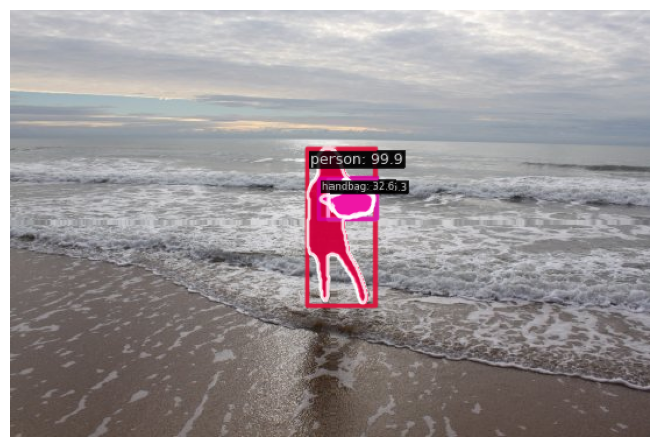

In [12]:
IMAGE_PATH ="/content/drive/MyDrive/Images/beautiful-private-beach.jpg"
image = mmcv.imread(IMAGE_PATH,channel_order='rgb')
result = segment_image(image)
vis = visualize_result(visualizer,image,result)
vis.show()


### Object Removal

#### Setup

In [13]:
%matplotlib ipympl

In [14]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

'''Returns the index of the bounding box which contains the given points, (only the first match)'''
def get_detected_object(det_bb, point):
  pt_x, pt_y = point
  for i,bb in enumerate(det_bb):
    det_bb_xmin, det_bb_ymin, det_bb_xmax, det_bb_ymax = bb
    if (det_bb_xmin <= pt_x <= det_bb_xmax ) and (det_bb_ymin <= pt_y <= det_bb_ymax):
      return i
  return -1

def apply_mask(image, mask):
  mask = mask.cpu().numpy()

  r = image[:,:,0]*mask
  g = image[:,:,1]*mask
  b = image[:,:,2]*mask

  channels = []
  channels.append(r)
  channels.append(g)
  channels.append(b)

  masked_im = np.dstack(channels)
  image_n = mmcv.imread(IMAGE_PATH,channel_order='rbg')
  
  res_img = image - masked_im
  return res_img

#### Click on the object to select

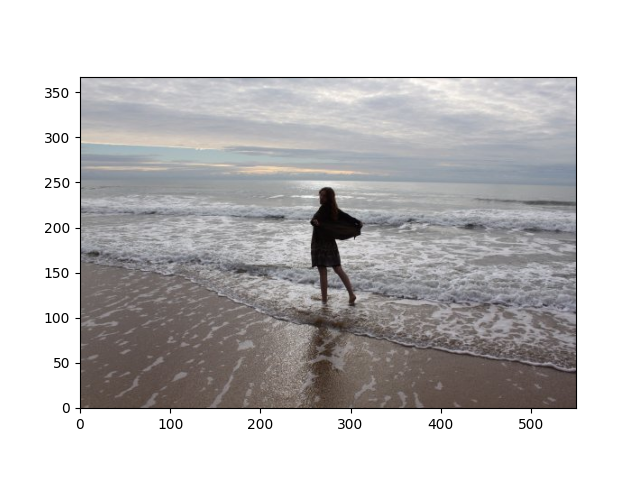

248.3870967741936 192.81451612903234


In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
im = ax.imshow(image, extent=[0, image.shape[1], 0, image.shape[0]])
# x = np.array(range(256))
# ax.plot(x, x, ls='dotted', linewidth=2, color='red')
plotted_points = []
def onclick(event):
    ix, iy = event.xdata, event.ydata
    plotted_points.append((ix,iy))
    print(ix, iy)
    fig.canvas.mpl_disconnect(cid)

cid = fig.canvas.mpl_connect('button_press_event', onclick)


In [20]:
out = get_result_info(result)

selected_point = (plotted_points[0][0], image.shape[0]-plotted_points[0][1])
# Get the selected point
obj_idx = get_detected_object(out['bboxes'], selected_point)

# Get the label and mask for the selected object
obj_mask = out['masks'][obj_idx]
obj_lbl = out['labels'][obj_idx]

print(f"The selected object is: {labels[obj_lbl]}")

The selected object is: handbag


In [21]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [22]:
import PIL

mask = tensor_to_image(obj_mask.cpu().numpy())

In [23]:
mask = np.array(mask)/255.

In [24]:
mask = (np.ones(mask.shape) - mask) * 255.

In [25]:
%mkdir masks

In [26]:
import cv2
plt.imshow(obj_mask.cpu().numpy())
MASK_DIR = "/content/mmdetection/masks"
cv2.imwrite(f"{MASK_DIR}/mask.png", mask)
selected_point

(248.3870967741936, 174.18548387096766)

In [27]:
plt.imshow(obj_mask.cpu().numpy())
selected_point

(248.3870967741936, 174.18548387096766)

In [28]:
out['bboxes'][obj_idx]

tensor([265.3271, 145.7131, 313.3846, 181.2885], device='cuda:0')

In [29]:
import cv2
plt.imshow(obj_mask.cpu().numpy())
MASK_DIR = "/content/mmdetection/masks"
cv2.imwrite(f"{MASK_DIR}/mask.png", mask)
selected_point

(248.3870967741936, 174.18548387096766)

#### Apply mask to the object

In [30]:
import cv2
result_image = apply_mask(image,obj_mask)
convt_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

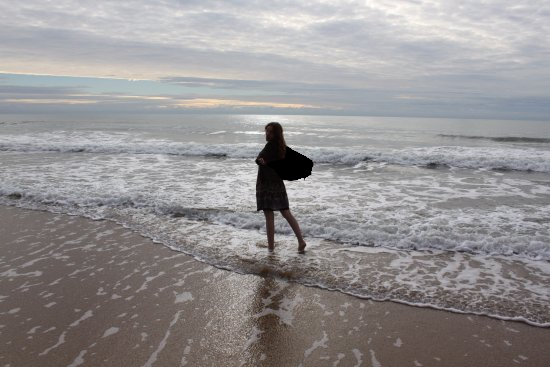

In [31]:
cv2_imshow(convt_image)